# Result

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

%matplotlib inline

In [2]:
from methods.evaluation import Evaluation

In [3]:
domains = ['eclipse', 'netbeans', 'openoffice']
methods = ['baseline', 'baseline_dwen', 'propose', 'propose_softmax', 'propose_master_triplet_loss', 'doc2vec', 'fasttext']
authors = { 'baseline': 'Deshmukh et al. (2017)', 
            'baseline_dwen': 'Budhiraja et al. (2018)',
            'propose': 'P-Contextual',
           'propose_softmax': 'P-Softmax', 
           'propose_master_triplet_loss': 'Proposta',
            'doc2vec': 'Doc2vec',
           'fasttext': 'FastText'
          }

### Retrieval 

In [78]:
recall = []
aproach, recall_index, datasets = [], [], []
df = pd.DataFrame(columns=['method', 'acc', 'recall@k', 'domain'])

for domain in domains:
    # Domain to use
    DOMAIN = domain
    # Dataset paths
    DIR = 'data/processed/{}'.format(DOMAIN)

    for method in methods:
        evaluation = Evaluation(0)
        path = os.path.join(DIR, 'exported_rank_{}.txt'.format(method))
        try:
            report = evaluation.evaluate(path)
            recall.append(report['1 - recall_at_5'])
            recall.append(report['2 - recall_at_10'])
            recall.append(report['3 - recall_at_15'])
            recall.append(report['4 - recall_at_20'])
            recall.append(report['5 - recall_at_25'])
            aproach += [authors[method]] * 5
            datasets += [domain] * 5
            recall_index += [5, 10, 15, 20, 25]
            print(path)
        except Exception as e:
            print(e)
            print("Does not exist result for: {}".format(path))
            pass

df['acc'] = recall
df['recall@k'] = recall_index
df['method'] = aproach
df['domain'] = datasets

data/processed/eclipse/exported_rank_baseline.txt
data/processed/eclipse/exported_rank_baseline_dwen.txt
data/processed/eclipse/exported_rank_propose.txt
data/processed/eclipse/exported_rank_propose_softmax.txt
data/processed/eclipse/exported_rank_propose_master_triplet_loss.txt
data/processed/eclipse/exported_rank_doc2vec.txt
data/processed/eclipse/exported_rank_fasttext.txt
data/processed/netbeans/exported_rank_baseline.txt
data/processed/netbeans/exported_rank_baseline_dwen.txt
data/processed/netbeans/exported_rank_propose.txt
data/processed/netbeans/exported_rank_propose_softmax.txt
data/processed/netbeans/exported_rank_propose_master_triplet_loss.txt
data/processed/netbeans/exported_rank_doc2vec.txt
data/processed/netbeans/exported_rank_fasttext.txt
data/processed/openoffice/exported_rank_baseline.txt
data/processed/openoffice/exported_rank_baseline_dwen.txt
data/processed/openoffice/exported_rank_propose.txt
data/processed/openoffice/exported_rank_propose_softmax.txt
data/process

In [79]:
df[df['method'] == authors['baseline']]

,method,acc,recall@k,domain
0,Deshmukh et al. (2017),0.35,5,eclipse
1,Deshmukh et al. (2017),0.42,10,eclipse
2,Deshmukh et al. (2017),0.46,15,eclipse
3,Deshmukh et al. (2017),0.49,20,eclipse
4,Deshmukh et al. (2017),0.52,25,eclipse
35,Deshmukh et al. (2017),0.59,5,netbeans
36,Deshmukh et al. (2017),0.66,10,netbeans
37,Deshmukh et al. (2017),0.70,15,netbeans
38,Deshmukh et al. (2017),0.72,20,netbeans
39,Deshmukh et al. (2017),0.74,25,netbeans


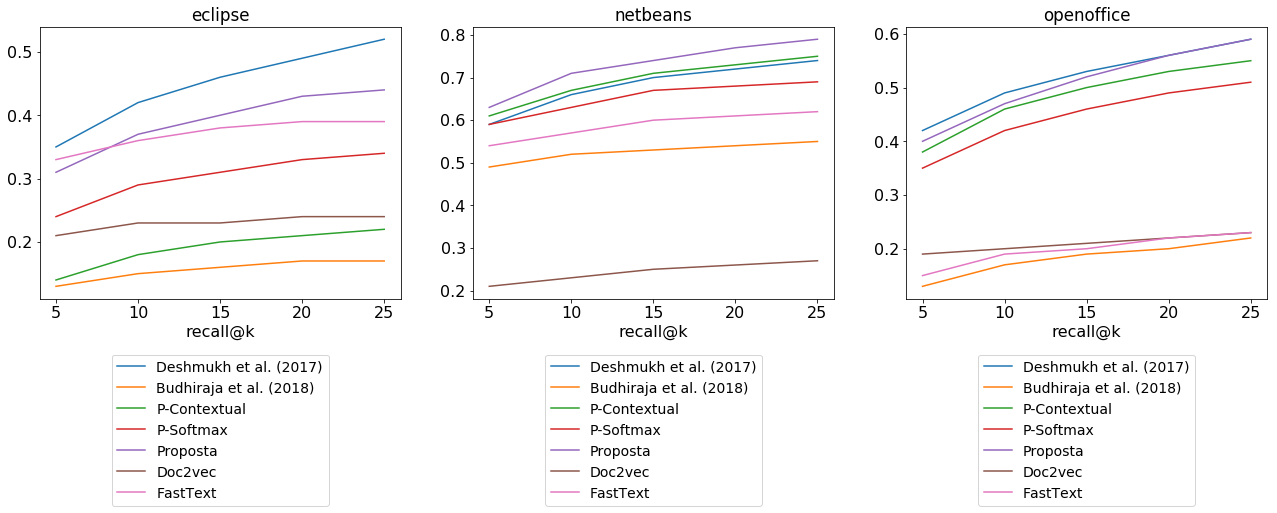

In [80]:
import matplotlib.ticker as mticker

MEDIUM_SIZE = 16
SMALL_SIZE = 14

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels

#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# equivalent but more general
fig, axes = plt.subplots(nrows=1, ncols=len(domains), figsize=(22, 5))

for index, domain in enumerate(domains):
    aproachs = df['method'].unique()
    for method in aproachs:
        experiment = df[(df['method'] == method) & (df['domain'] == domain)]
        if experiment.shape[0] > 0:
            experiment.plot(x='recall@k', y='acc', label=method, ax=axes[index])
            
    axes[index].set_title('{}'.format(domain))
    axes[index].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18))
    formatter = mticker.ScalarFormatter()
    axes[index].xaxis.set_major_formatter(formatter)
    axes[index].xaxis.set_major_locator(mticker.FixedLocator([5, 10, 15, 20, 25]))

plt.savefig('retrieval.png')

### Classification

In [81]:
import _pickle as pickle

rows = []

for domain in domains:
    # Dataset paths
    DIR = 'data/processed/{}'.format(domain)
    
    for method in methods:
        path = os.path.join(DIR, 'classification_{}.pkl'.format(method))

        try:
            with open(path, 'rb') as f:
                result = pickle.load(f)

            print(path)

            rows.append({ 'autor': authors[result['method']], 'acurácia' : result['acc_test'], 'roc/auc' : result['roc_test'],  
                         'domain' : domain })
        except:
            print("Does not exist result for: {}".format(path))
            pass
    
df_cls = pd.DataFrame(data=rows, columns=['autor', 'acurácia', 'roc/auc', 'domain'])

data/processed/eclipse/classification_baseline.pkl
data/processed/eclipse/classification_baseline_dwen.pkl
data/processed/eclipse/classification_propose.pkl
Does not exist result for: data/processed/eclipse/classification_propose_softmax.pkl
Does not exist result for: data/processed/eclipse/classification_propose_master_triplet_loss.pkl
data/processed/eclipse/classification_doc2vec.pkl
data/processed/eclipse/classification_fasttext.pkl
data/processed/netbeans/classification_baseline.pkl
data/processed/netbeans/classification_baseline_dwen.pkl
data/processed/netbeans/classification_propose.pkl
Does not exist result for: data/processed/netbeans/classification_propose_softmax.pkl
Does not exist result for: data/processed/netbeans/classification_propose_master_triplet_loss.pkl
data/processed/netbeans/classification_doc2vec.pkl
data/processed/netbeans/classification_fasttext.pkl
data/processed/openoffice/classification_baseline.pkl
data/processed/openoffice/classification_baseline_dwen.pkl


In [82]:
df_cls

,autor,acurácia,roc/auc,domain
0,Deshmukh et al. (2017),0.865854,0.988168,eclipse
1,Budhiraja et al. (2018),0.571552,0.811551,eclipse
2,P-Contextual,0.954909,0.988614,eclipse
3,Doc2vec,0.583279,0.583279,eclipse
4,FastText,0.762874,0.762874,eclipse
5,Deshmukh et al. (2017),0.700000,0.986800,netbeans
6,Budhiraja et al. (2018),0.688613,0.826750,netbeans
7,P-Contextual,0.959807,0.994378,netbeans
8,Doc2vec,0.592042,0.592042,netbeans
9,FastText,0.796184,0.796184,netbeans


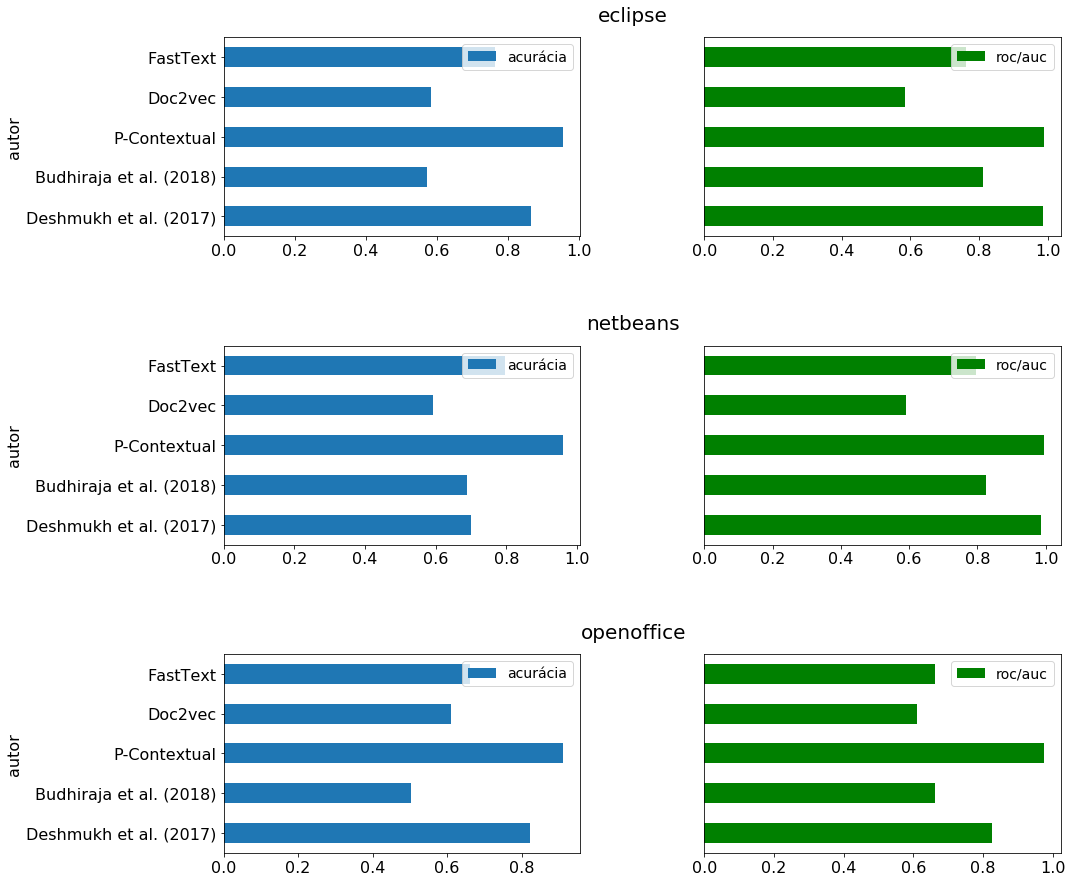

In [83]:
fig, axes = plt.subplots(nrows=len(domains), ncols=2, figsize=(15, 15))

for row, domain in enumerate(domains):
    plt.text(1.15, 1.08, domain,
         horizontalalignment='center',
         fontsize=20,
         transform = axes[row, 0].transAxes)
    ax = df_cls[df_cls['domain'] == domain].set_index('autor')[['acurácia']].plot.barh(ax=axes[row, 0])
    #ax.set_title(domain)
    ax = df_cls[df_cls['domain'] == domain].set_index('autor')[['roc/auc']].plot.barh(ax=axes[row, 1], color='g')
    ax.get_yaxis().set_visible(False)
    #ax.set_title(domain)
    
plt.subplots_adjust(hspace=0.55,
                    wspace=0.35)